In [2]:
#this gives me the functions 
%run "C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Elastic_net_linear_regression\ak_main_preprocessing.ipynb"

Filtered from 8544 to 5733 proteins
Completeness threshold: 0.95
Converted 94 samples to log ratios
Found 61 unique targeted proteins out of 277 total targets
Shape of targeted proteins dataframe: (94, 73)


In [3]:
# 8000×8000 Pearson correlation matrix
no_metadata_log_ratios=log_ratios.iloc[:,:-12]
corr_mat = no_metadata_log_ratios.corr(method="pearson")

UMAP(metric='precomputed', min_dist=0.4, n_jobs=1, random_state=42, verbose=True)
Thu Jun 12 14:10:30 2025 Construct fuzzy simplicial set
Thu Jun 12 14:10:30 2025 Finding Nearest Neighbors
Thu Jun 12 14:10:32 2025 Finished Nearest Neighbor Search
Thu Jun 12 14:10:32 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs


Epochs completed:  14%| █▍         72/500 [00:00]

	completed  50  /  500 epochs


Epochs completed:  22%| ██▏        108/500 [00:01]

	completed  100  /  500 epochs


Epochs completed:  32%| ███▏       162/500 [00:01]

	completed  150  /  500 epochs


Epochs completed:  45%| ████▌      225/500 [00:02]

	completed  200  /  500 epochs


Epochs completed:  52%| █████▏     261/500 [00:03]

	completed  250  /  500 epochs


Epochs completed:  63%| ██████▎    315/500 [00:03]

	completed  300  /  500 epochs


Epochs completed:  74%| ███████▍   369/500 [00:04]

	completed  350  /  500 epochs


Epochs completed:  85%| ████████▍  423/500 [00:04]

	completed  400  /  500 epochs


Epochs completed:  94%| █████████▎ 468/500 [00:05]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:05]


Thu Jun 12 14:10:38 2025 Finished embedding


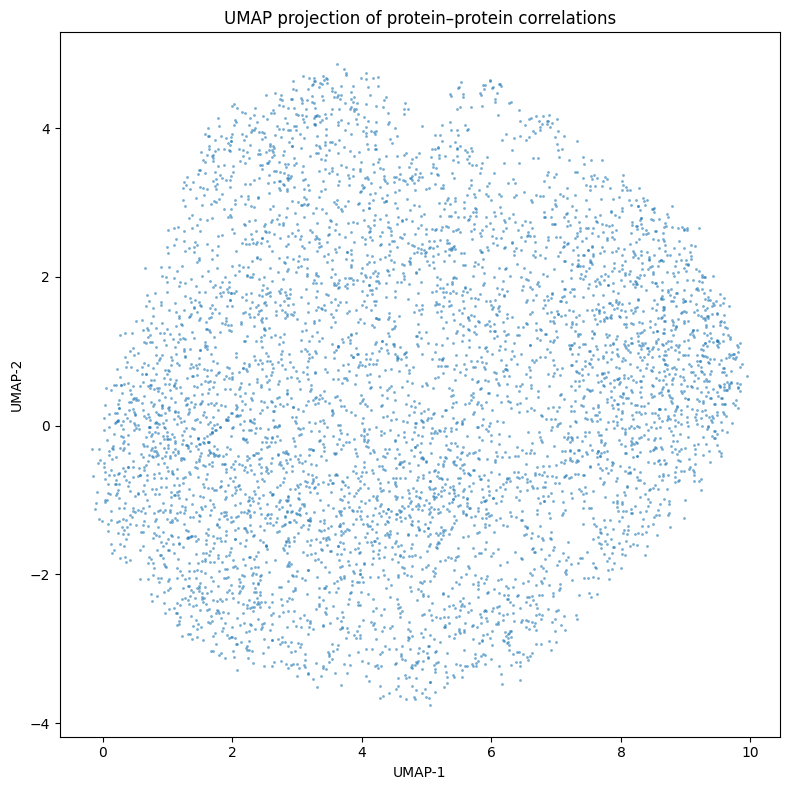

In [ ]:
# --- 0.  Install if needed ----------------------------------------------------
# pip install umap-learn  # (or conda install -c conda-forge umap-learn)

# --- 1.  Imports --------------------------------------------------------------
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt

# --- 2.  Start from your existing correlation matrix -------------------------
# corr_mat: a pandas DataFrame, index = columns = protein IDs, dtype float
#   If you followed the earlier steps, you probably already have it:
#       corr_mat = df_z.corr(method="pearson")

# --- 3.  Convert correlation to a distance matrix ----------------------------
# UMAP with metric='precomputed' requires a non-negative distance.
# Using   d = 1 – r   (or (1 – r)/2) is standard for correlations.
dist_mat = 1.0 - corr_mat.values            # numpy array (float32 is fine)

# OPTIONAL: cast to float32 to halve RAM (~250 MB → ~125 MB for 8 000²)
dist_mat = dist_mat.astype(np.float32)

# --- 4.  Run UMAP -------------------------------------------------------------
reducer = umap.UMAP(
    n_neighbors=15,          # tweak: 5–50; smaller → preserve local structure
    min_dist=0.1,            # tweak: 0.0 = very tight clusters, 0.5 = looser
    n_components=2,          # 2-D; change to 3 for 3-D embeddings
    metric='precomputed',
    random_state=42,
    verbose=True             # prints progress so you know it’s working
)

embedding = reducer.fit_transform(dist_mat)
# embedding is an (8000 × 2) NumPy array

# --- 5.  Visualise ------------------------------------------------------------
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding[:, 0], embedding[:, 1],
    s=4, alpha=0.6, linewidths=0
)
plt.title("UMAP projection of protein–protein correlations")
plt.xlabel("UMAP-1");  plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()
